# Классификация СC50 превышает медианное значение

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Загрузка данных и разделение на выборки

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
target = 'SI'

In [4]:
df = pd.read_parquet("data/processed_data_full.parquet")

In [5]:
df["SI_gt_median"] = (df[target] > df[target].median()).astype(int)

In [6]:
df

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,SI_gt_median
0,-1.732405,1.222549,0.851581,-0.772814,1.052557,0.284504,-1.522105,1.500099,-2.075118,-0.576677,...,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,6.239374,175.482382,28.125000,1
1,-2.074548,2.091417,0.943841,-0.560001,1.232249,0.316257,-1.722757,1.238276,-2.223551,-0.566152,...,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,0.771831,5.402819,7.000000,1
2,-2.477594,2.146889,0.949731,-1.510821,0.994298,0.773991,-1.089544,1.078060,-2.409092,-0.540065,...,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,223.808778,161.142320,0.720000,0
3,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.03167,-0.03167,-0.234453,-0.274647,3.119291,-0.084045,1.705624,107.855654,63.235294,1
4,-1.715364,0.530810,0.778129,-0.717729,0.548297,0.930745,-1.336166,1.977954,-2.253237,-0.576068,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,107.131532,139.270991,1.300000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.636029,-0.787198,0.308399,-0.936087,1.540346,0.519892,0.634955,-0.805298,-0.036641,-0.455162,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.000104,34.999650,1.129017,0
994,0.847612,-0.892065,0.167966,-0.998958,1.179465,1.079648,0.709726,-0.790893,-0.234551,-0.455160,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.999934,33.999415,1.062484,0
995,0.955251,-0.914547,0.198520,-1.397599,0.977489,1.553108,0.712233,-0.790785,0.065439,0.617677,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,30.999883,33.999458,1.096761,0
996,0.906465,-0.203625,-0.278284,-0.941713,0.743712,1.371138,0.593365,-0.807503,-1.601738,-0.458386,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.998959,32.999644,1.031272,0


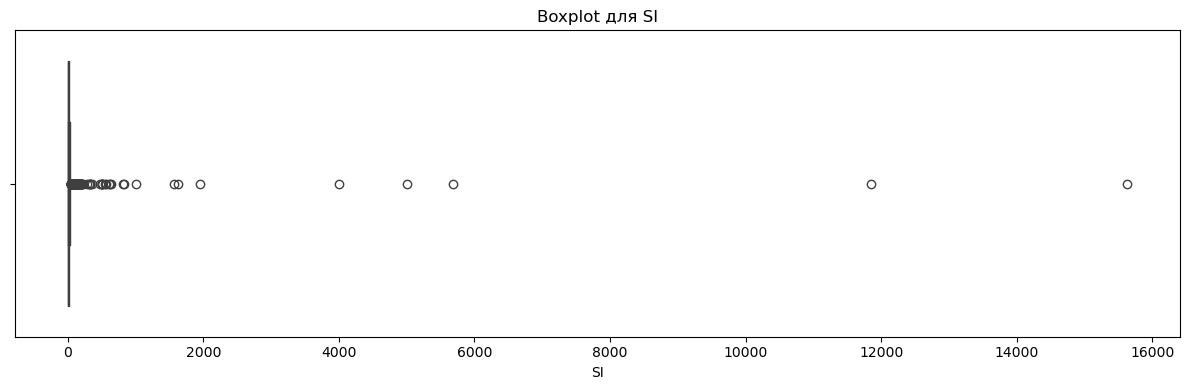

In [7]:
plt.figure(figsize=(12, 4))

sns.boxplot(x=df[target])

plt.title(f'Boxplot для {target}')
plt.tight_layout()
plt.show()

In [8]:
mean = df[target].mean()
std = df[target].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

outliers = df[(df[target] < lower_bound) | (df[target] > upper_bound)]

print("Выбросы по правилу 3 сигм:")
outliers

Выбросы по правилу 3 сигм:


,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,SI_gt_median
107,0.355556,-0.808845,0.580042,-0.047797,0.656361,-0.741293,0.972481,-0.660642,0.563687,-0.457965,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,0.393088,1965.439708,5000.000000,1
768,0.137385,-0.946394,-0.012520,0.417083,-0.258633,-0.505339,0.735449,-0.927678,1.487269,-0.461165,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,0.003517,19.999437,5687.000000,1
770,0.137385,-0.946394,-0.012520,0.417083,-0.258633,-0.505339,0.735449,-0.927678,1.487269,-0.461165,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,0.021100,250.001758,11848.333333,1
793,0.339732,-0.708292,0.344044,0.519138,-0.371195,-0.284410,0.754228,-0.726871,0.920526,-0.458852,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,0.032009,128.090060,4001.700000,1
796,0.339732,-0.708292,0.344044,0.519138,-0.371195,-0.284410,0.754228,-0.726871,0.920526,-0.458852,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,0.016004,249.999200,15620.600000,1


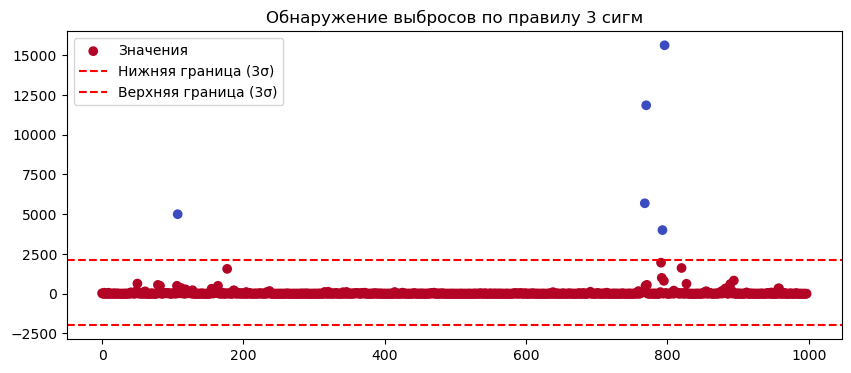

In [9]:
df['is_outlier_3σ'] = (df[target] < lower_bound) | (df[target] > upper_bound)

plt.figure(figsize=(10, 4))
plt.scatter(df.index, df[target], c=~df['is_outlier_3σ'], cmap='coolwarm', label='Значения')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Нижняя граница (3σ)')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Верхняя граница (3σ)')
plt.legend()
plt.title('Обнаружение выбросов по правилу 3 сигм')
plt.show()

In [10]:
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df["is_outlier_IQR"] = (df[target] < lower_bound) | (df[target] > upper_bound)
df[(df[target] < lower_bound) | (df[target] > upper_bound)]

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,SI_gt_median,is_outlier_3σ,is_outlier_IQR
3,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.234453,-0.274647,3.119291,-0.084045,1.705624,107.855654,63.235294,1,False,True
9,-1.417714,0.345653,0.758468,-0.666417,0.539312,0.946275,-0.840004,-0.657698,-2.253237,-0.462484,...,-0.234453,-0.274647,-0.168855,-0.084045,6.400847,400.906360,62.633333,1,False,True
41,-1.732405,1.222549,0.851581,-0.772814,1.052557,0.284504,-1.522105,1.500099,-2.075118,-0.576677,...,-0.234453,-0.274647,2.297254,-0.084045,15.078486,1344.065056,89.137931,1,False,True
44,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.234453,-0.274647,3.119291,-0.084045,22.825266,1254.135512,54.945055,1,False,True
47,-1.727458,1.290243,0.858769,-1.607705,0.623477,0.947291,-1.522105,1.500099,-2.546610,-0.576794,...,-0.234453,-0.274647,7.229473,-0.084045,45.006900,2216.216562,49.241706,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,0.659083,0.730976,-0.432297,0.560932,-0.624908,-0.426982,0.861013,-0.437833,-0.779704,-0.445203,...,-0.234453,-0.274647,-0.168855,-0.084045,6.299480,500.000000,79.371629,1,False,True
957,-1.609520,1.295864,0.859366,1.527934,0.515013,-0.268314,-0.457250,0.689062,0.164868,0.615412,...,-0.234453,3.641036,-0.168855,-0.084045,0.298932,99.999046,334.521277,1,False,True
958,-1.609520,1.295864,0.859366,1.527934,0.515013,-0.268314,-0.457250,0.689062,0.164868,0.615412,...,-0.234453,3.641036,-0.168855,-0.084045,0.298932,99.999046,334.521277,1,False,True
966,1.170154,-0.602861,-0.278145,-1.496614,-1.134865,2.459102,1.330155,-0.809777,-1.110305,-0.279200,...,-0.234453,-0.274647,-0.168855,-0.084045,1.900747,99.999546,52.610669,1,False,True


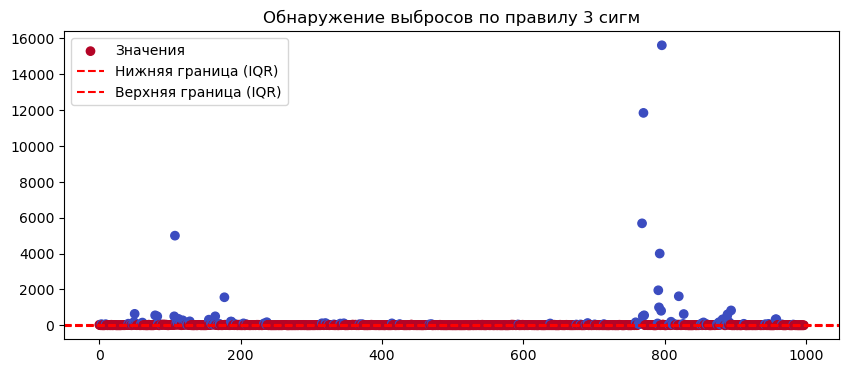

In [11]:
plt.figure(figsize=(10, 4))
plt.scatter(df.index, df[target], c=~df['is_outlier_IQR'], cmap='coolwarm', label='Значения')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Нижняя граница (IQR)')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Верхняя граница (IQR)')
plt.legend()
plt.title('Обнаружение выбросов по правилу 3 сигм')
plt.show()

Отбросим выбросов по 3-м сигмам значительно меньше, чем по правилу Тьюки. 

Данные распределены близко к нормальному распределнию, следовательно отбросим выбросы по 3 sigma

In [12]:
df

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,SI_gt_median,is_outlier_3σ,is_outlier_IQR
0,-1.732405,1.222549,0.851581,-0.772814,1.052557,0.284504,-1.522105,1.500099,-2.075118,-0.576677,...,-0.234453,-0.274647,2.297254,-0.084045,6.239374,175.482382,28.125000,1,False,False
1,-2.074548,2.091417,0.943841,-0.560001,1.232249,0.316257,-1.722757,1.238276,-2.223551,-0.566152,...,-0.234453,-0.274647,2.297254,-0.084045,0.771831,5.402819,7.000000,1,False,False
2,-2.477594,2.146889,0.949731,-1.510821,0.994298,0.773991,-1.089544,1.078060,-2.409092,-0.540065,...,-0.234453,-0.274647,2.297254,-0.084045,223.808778,161.142320,0.720000,0,False,False
3,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.234453,-0.274647,3.119291,-0.084045,1.705624,107.855654,63.235294,1,False,True
4,-1.715364,0.530810,0.778129,-0.717729,0.548297,0.930745,-1.336166,1.977954,-2.253237,-0.576068,...,-0.234453,-0.274647,-0.168855,-0.084045,107.131532,139.270991,1.300000,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.636029,-0.787198,0.308399,-0.936087,1.540346,0.519892,0.634955,-0.805298,-0.036641,-0.455162,...,-0.234453,-0.274647,-0.168855,-0.084045,31.000104,34.999650,1.129017,0,False,False
994,0.847612,-0.892065,0.167966,-0.998958,1.179465,1.079648,0.709726,-0.790893,-0.234551,-0.455160,...,-0.234453,-0.274647,-0.168855,-0.084045,31.999934,33.999415,1.062484,0,False,False
995,0.955251,-0.914547,0.198520,-1.397599,0.977489,1.553108,0.712233,-0.790785,0.065439,0.617677,...,-0.234453,-0.274647,-0.168855,-0.084045,30.999883,33.999458,1.096761,0,False,False
996,0.906465,-0.203625,-0.278284,-0.941713,0.743712,1.371138,0.593365,-0.807503,-1.601738,-0.458386,...,-0.234453,-0.274647,-0.168855,-0.084045,31.998959,32.999644,1.031272,0,False,False


In [13]:
target_old = target
target = "SI_gt_median"

In [14]:
# data_cleaned_IQR = df[~df['is_outlier_IQR']].drop(columns=['is_outlier_IQR', 'is_outlier_3σ'])
data_cleaned_IQR = df[~df['is_outlier_3σ']].drop(columns=['is_outlier_IQR', 'is_outlier_3σ', target_old])

data_cleaned_IQR

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI_gt_median
0,-1.732405,1.222549,0.851581,-0.772814,1.052557,0.284504,-1.522105,1.500099,-2.075118,-0.576677,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,6.239374,175.482382,1
1,-2.074548,2.091417,0.943841,-0.560001,1.232249,0.316257,-1.722757,1.238276,-2.223551,-0.566152,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,0.771831,5.402819,1
2,-2.477594,2.146889,0.949731,-1.510821,0.994298,0.773991,-1.089544,1.078060,-2.409092,-0.540065,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,223.808778,161.142320,0
3,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,3.119291,-0.084045,1.705624,107.855654,1
4,-1.715364,0.530810,0.778129,-0.717729,0.548297,0.930745,-1.336166,1.977954,-2.253237,-0.576068,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,107.131532,139.270991,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.636029,-0.787198,0.308399,-0.936087,1.540346,0.519892,0.634955,-0.805298,-0.036641,-0.455162,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.000104,34.999650,0
994,0.847612,-0.892065,0.167966,-0.998958,1.179465,1.079648,0.709726,-0.790893,-0.234551,-0.455160,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.999934,33.999415,0
995,0.955251,-0.914547,0.198520,-1.397599,0.977489,1.553108,0.712233,-0.790785,0.065439,0.617677,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,30.999883,33.999458,0
996,0.906465,-0.203625,-0.278284,-0.941713,0.743712,1.371138,0.593365,-0.807503,-1.601738,-0.458386,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.998959,32.999644,0


In [15]:
X = data_cleaned_IQR[data_cleaned_IQR.columns[:-3]]
y_ic50 = data_cleaned_IQR[target]

In [16]:
X

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-1.732405,1.222549,0.851581,-0.772814,1.052557,0.284504,-1.522105,1.500099,-2.075118,-0.576677,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045
1,-2.074548,2.091417,0.943841,-0.560001,1.232249,0.316257,-1.722757,1.238276,-2.223551,-0.566152,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045
2,-2.477594,2.146889,0.949731,-1.510821,0.994298,0.773991,-1.089544,1.078060,-2.409092,-0.540065,...,6.406778,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045
3,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,3.119291,-0.084045
4,-1.715364,0.530810,0.778129,-0.717729,0.548297,0.930745,-1.336166,1.977954,-2.253237,-0.576068,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.636029,-0.787198,0.308399,-0.936087,1.540346,0.519892,0.634955,-0.805298,-0.036641,-0.455162,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045
994,0.847612,-0.892065,0.167966,-0.998958,1.179465,1.079648,0.709726,-0.790893,-0.234551,-0.455160,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045
995,0.955251,-0.914547,0.198520,-1.397599,0.977489,1.553108,0.712233,-0.790785,0.065439,0.617677,...,-0.181542,3.676931,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045
996,0.906465,-0.203625,-0.278284,-0.941713,0.743712,1.371138,0.593365,-0.807503,-1.601738,-0.458386,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045


In [17]:
y_ic50

0      1
1      1
2      0
3      1
4      0
      ..
993    0
994    0
995    0
996    0
997    0
Name: SI_gt_median, Length: 993, dtype: int64

In [18]:
X_train, X_test, y_train_ic50, y_test_ic50 = train_test_split(
    X, y_ic50, test_size=0.15, random_state=42
)

In [19]:
class_ratio = np.mean(y_train_ic50)
print(f"Баланс классов: {class_ratio:.2f} / {1-class_ratio:.2f}")

Баланс классов: 0.49 / 0.51


## Инициализация моделей и метрик

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import (roc_auc_score, f1_score, precision_score, 
                             recall_score, confusion_matrix, roc_curve)
import numpy as np

In [21]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [22]:
MODELS = {
    'logreg': LogisticRegression(random_state=RANDOM_STATE),
    'rf': RandomForestClassifier(random_state=RANDOM_STATE),
    'xgb': XGBClassifier(random_state=RANDOM_STATE),
}

metrics = {
    'ROC-AUC': roc_auc_score,
    'F1': lambda y_true, y_pred: f1_score(y_true, y_pred, average='binary'),
    'PRECISION': lambda y_true, y_pred: precision_score(y_true, y_pred, average='binary'),
    'RECALL': lambda y_true, y_pred: recall_score(y_true, y_pred, average='binary')
}

## Бейзлайн

Проверим перечисленные модели

In [ ]:
results = []

for name, model in MODELS.items():
    
    cv_scores = cross_val_score(model, X_train, y_train_ic50,
                               cv=5, scoring='roc_auc', n_jobs=-1)
    
    model.fit(X_train, y_train_ic50)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    model_metrics = {}
    for metric_name, metric_func in metrics.items():
        if metric_name == 'ROC-AUC':
            model_metrics[metric_name] = metric_func(y_test_ic50, y_proba)
        else:
            model_metrics[metric_name] = metric_func(y_test_ic50, y_pred)
    
    results.append({
        'model': name,
        'cv_mean_roc_auc': np.mean(cv_scores),
        'cv_std_roc_auc': np.std(cv_scores),
        **model_metrics
    })

results_df = pd.DataFrame(results)
print(results_df)

/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

    model  cv_mean_roc_auc  cv_std_roc_auc   ROC-AUC        F1  PRECISION  \
0  logreg         0.693108        0.010383  0.642767  0.571429   0.617647   
1      rf         0.733212        0.010403  0.678300  0.621622   0.666667   
2     xgb         0.716309        0.015004  0.665009  0.626667   0.661972   

     RECALL  
0  0.531646  
1  0.582278  
2  0.594937  


Как видно, деревья и SVR дают лучшие результаты.

Попробуем оптимизировать их с помощью подбора гиперпараметров

## Оптимизация

Будем оптимизировать при помощи Optuna

In [24]:
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import joblib
import matplotlib.pyplot as plt

In [ ]:
N_TRIALS_LR = 100
CV_FOLDS_LR = 10

N_TRIALS_RF = 100
CV_FOLDS_RF = 10

N_TRIALS_XGB = 100
CV_FOLDS_XGB = 10

### LogisticRegression

In [26]:
def optimize_lr(trial):
    params = {
        'C': trial.suggest_float('C', 0.01, 100, log=True),
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        'solver': 'saga',
        'max_iter': 1000,
        'random_state': RANDOM_STATE
    }
    model = LogisticRegression(**params)
    return cross_val_score(
        model, X_train, y_train_ic50, cv=CV_FOLDS_LR, scoring='roc_auc', n_jobs=-1
    ).mean()

In [27]:
study_lr = optuna.create_study(
        direction='maximize',
        sampler=TPESampler(seed=RANDOM_STATE)
        )
study_lr.optimize(optimize_lr, n_trials=N_TRIALS_LR, n_jobs=1)

[I 2025-06-03 13:55:28,551] A new study created in memory with name: no-name-60d12a52-dbe3-4f83-a173-cd6ac69619fd
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2025-06-03 13:55:30,638] Trial 0 finished with value: 0.6867870905215934 and parameters: {'C': 0.3148911647956863, 'penalty': 'l1'}. Best is trial 0 with value: 0.6867870905215934.
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max

In [28]:
print(f"Лучшие параметры для Logistic Regression:")
print(study_lr.best_params)
print(f"Лучший ROC-AUC: {study_lr.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_lr)
fig.show()

fig = optuna.visualization.plot_param_importances(study_lr)
fig.show()

Лучшие параметры для Logistic Regression:
{'C': 0.35558727247778094, 'penalty': 'l2'}
Лучший ROC-AUC: 0.7084


In [29]:
best_params_lr = study_lr.best_params
best_params_lr.update({
    'solver': 'saga',
    'max_iter': 1000,
    'random_state': RANDOM_STATE
})
best_lr_model = LogisticRegression(**best_params_lr)

In [30]:
best_lr_model.fit(X_train, y_train_ic50)
y_proba_lr = best_lr_model.predict_proba(X_test)[:, 1]
y_pred_lr = best_lr_model.predict(X_test)

In [31]:
final_metrics_lr = {
    'roc_auc': roc_auc_score(y_test_ic50, y_proba_lr),
    'f1': f1_score(y_test_ic50, y_pred_lr),
    'precision': precision_score(y_test_ic50, y_pred_lr),
    'recall': recall_score(y_test_ic50, y_pred_lr),
    'accuracy': (y_pred_lr == y_test_ic50).mean()
}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_lr.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
roc_auc: 0.6439
f1: 0.5833
precision: 0.6462
recall: 0.5316
accuracy: 0.5973


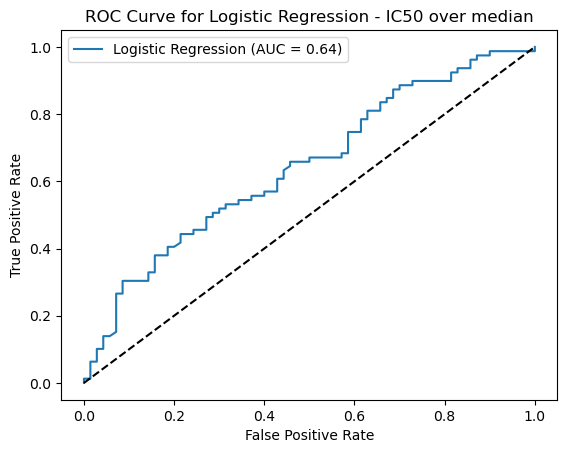

In [32]:
fpr, tpr, _ = roc_curve(y_test_ic50, y_proba_lr)
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {final_metrics_lr["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Logistic Regression - IC50 over median')
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix: Logistic Regression - IC50 over median')

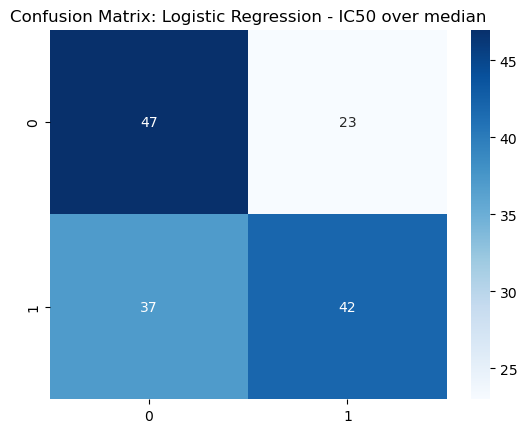

In [33]:
cm = confusion_matrix(y_test_ic50, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: Logistic Regression - IC50 over median')

In [34]:
if hasattr(best_lr_model, 'feature_importances_'):
    importances = best_lr_model.feature_importances_
    sorted_idx = importances.argsort()[::-1]
    top_features = min(20, X.shape[1])
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), X.columns[sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title(f'Top Features: Logistic Regression - IC50 over median')
    plt.tight_layout()

### Random Forest

In [35]:
def optimize_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': True,
        'random_state': RANDOM_STATE,
        'n_jobs': -1
    }
    model = RandomForestClassifier(**params)
    return cross_val_score(
        model, X_train, y_train_ic50, cv=CV_FOLDS_RF, scoring='roc_auc', n_jobs=-1
    ).mean()

In [36]:
study_rf = optuna.create_study(
        direction='maximize',
        sampler=TPESampler(seed=RANDOM_STATE)
        )
study_rf.optimize(optimize_rf, n_trials=N_TRIALS_RF, n_jobs=1)

[I 2025-06-03 13:56:39,155] A new study created in memory with name: no-name-1e1175f8-e661-4561-a826-cadd7460d8df
[I 2025-06-03 13:56:40,522] Trial 0 finished with value: 0.7473590580115579 and parameters: {'n_estimators': 437, 'max_depth': 29, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7473590580115579.
[I 2025-06-03 13:56:40,887] Trial 1 finished with value: 0.7479738302959679 and parameters: {'n_estimators': 152, 'max_depth': 27, 'min_samples_split': 13, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 1 with value: 0.7479738302959679.
[I 2025-06-03 13:56:42,799] Trial 2 finished with value: 0.7468512977132619 and parameters: {'n_estimators': 850, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 1 with value: 0.7479738302959679.
[I 2025-06-03 13:56:43,821] Trial 3 finished with value: 0.7492302564814922 and parameters: {'n_estimators': 489, 'max_depth': 12, 

In [37]:
print(f"Лучшие параметры для Random Forest:")
print(study_rf.best_params)
print(f"Лучший ROC-AUC: {study_rf.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_rf)
fig.show()

fig = optuna.visualization.plot_param_importances(study_rf)
fig.show()

Лучшие параметры для Random Forest:
{'n_estimators': 326, 'max_depth': 19, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Лучший ROC-AUC: 0.7526


In [38]:
best_params_rf = study_rf.best_params
best_rf_model = RandomForestClassifier(**best_params_rf)

In [39]:
best_rf_model.fit(X_train, y_train_ic50)
y_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
y_pred_rf = best_rf_model.predict(X_test)

In [40]:
final_metrics_rf = {
    'roc_auc': roc_auc_score(y_test_ic50, y_proba_rf),
    'f1': f1_score(y_test_ic50, y_pred_rf),
    'precision': precision_score(y_test_ic50, y_pred_rf),
    'recall': recall_score(y_test_ic50, y_pred_rf),
    'accuracy': (y_pred_rf == y_test_ic50).mean()
}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_rf.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
roc_auc: 0.6697
f1: 0.5753
precision: 0.6269
recall: 0.5316
accuracy: 0.5839


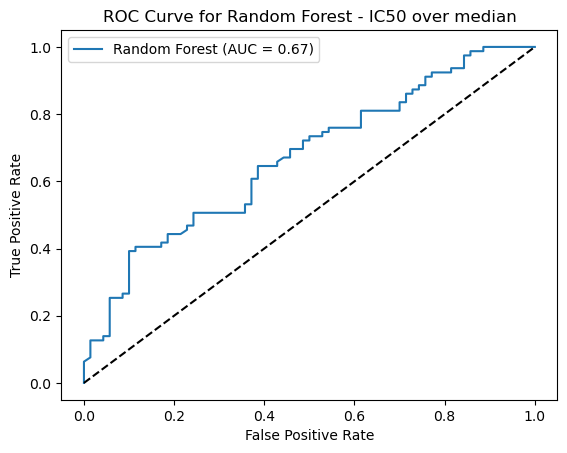

In [41]:
fpr, tpr, _ = roc_curve(y_test_ic50, y_proba_rf)
plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {final_metrics_rf["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Random Forest - IC50 over median')
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix: Random Forest - IC50 over median')

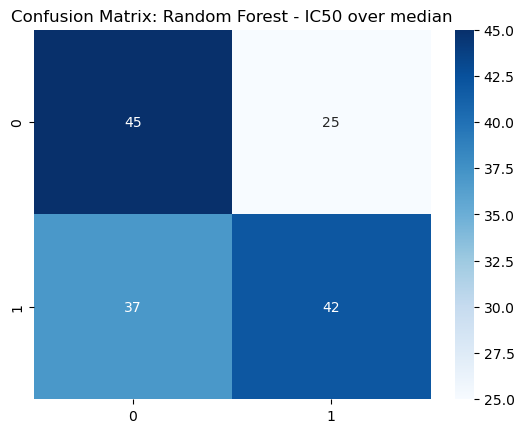

In [42]:
cm = confusion_matrix(y_test_ic50, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: Random Forest - IC50 over median')

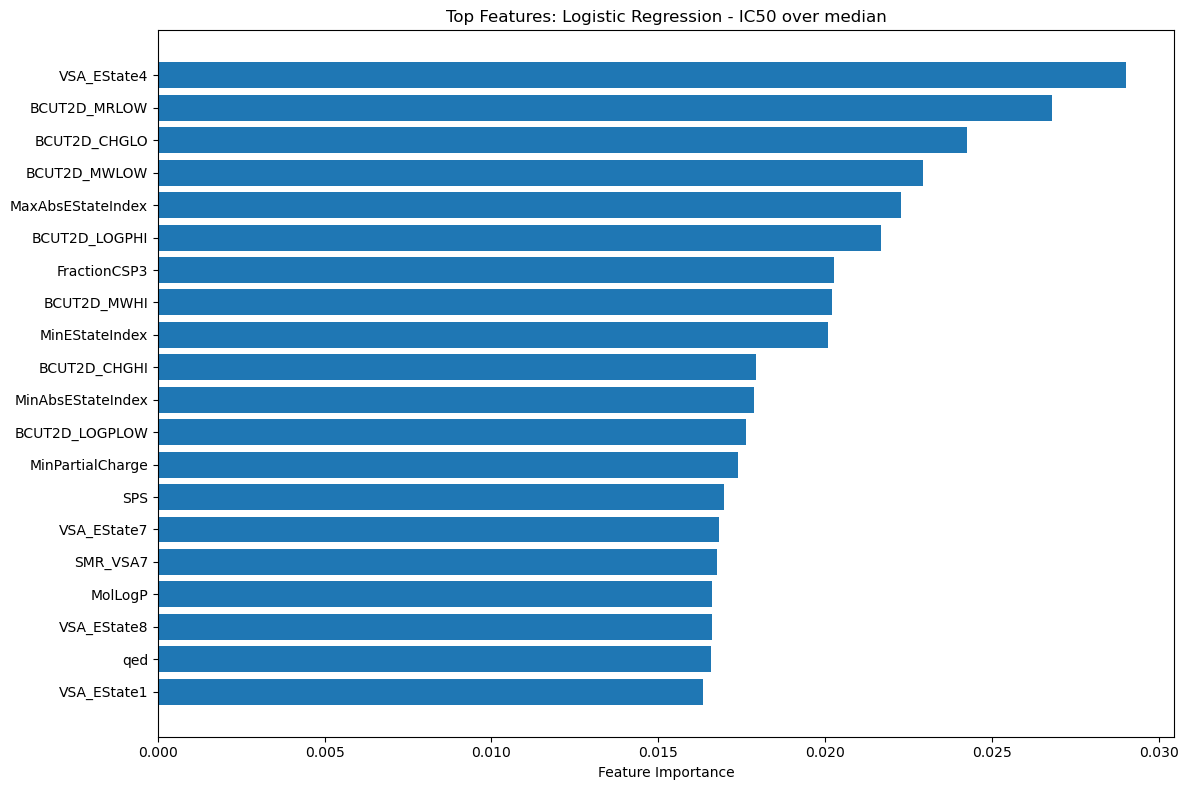

In [43]:
if hasattr(best_rf_model, 'feature_importances_'):
    importances = best_rf_model.feature_importances_
    sorted_idx = importances.argsort()[::-1]
    top_features = min(20, X.shape[1])
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), X.columns[sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title(f'Top Features: Logistic Regression - IC50 over median')
    plt.tight_layout()

### XGBoost

In [44]:
def optimize_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'use_label_encoder': False,
        'eval_metric': 'auc',
        'random_state': RANDOM_STATE
    }
    model = XGBClassifier(**params)
    return cross_val_score(
        model, X_train, y_train_ic50, cv=CV_FOLDS_XGB, scoring='roc_auc', n_jobs=-1
    ).mean()

In [45]:
study_xgb = optuna.create_study(
        direction='maximize',
        sampler=TPESampler(seed=RANDOM_STATE)
        )
study_xgb.optimize(optimize_xgb, n_trials=N_TRIALS_RF, n_jobs=1)

[I 2025-06-03 13:58:30,475] A new study created in memory with name: no-name-3909d666-1af1-43a5-ba91-642beddbe3f3
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:58:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1748292887431/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:58:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1748292887431/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:58:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1748292887431/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterat

In [46]:
print(f"Лучшие параметры для XGBoost:")
print(study_xgb.best_params)
print(f"Лучший ROC-AUC: {study_xgb.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_xgb)
fig.show()

fig = optuna.visualization.plot_param_importances(study_xgb)
fig.show()

Лучшие параметры для XGBoost:
{'n_estimators': 417, 'max_depth': 5, 'learning_rate': 0.05527001172889548, 'subsample': 0.6081860523051861, 'colsample_bytree': 0.9424201914351799, 'gamma': 0.3824580589318557, 'reg_alpha': 9.298479554494405, 'reg_lambda': 2.1529575771510103}
Лучший ROC-AUC: 0.7441


In [47]:
best_params_xgb = study_xgb.best_params
best_xgb_model = XGBClassifier(**best_params_xgb)

In [48]:
best_xgb_model.fit(X_train, y_train_ic50)
y_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = best_xgb_model.predict(X_test)

In [49]:
final_metrics_xgb = {
    'roc_auc': roc_auc_score(y_test_ic50, y_proba_xgb),
    'f1': f1_score(y_test_ic50, y_pred_xgb),
    'precision': precision_score(y_test_ic50, y_pred_xgb),
    'recall': recall_score(y_test_ic50, y_pred_xgb),
    'accuracy': (y_pred_xgb == y_test_ic50).mean()
}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_rf.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
roc_auc: 0.6697
f1: 0.5753
precision: 0.6269
recall: 0.5316
accuracy: 0.5839


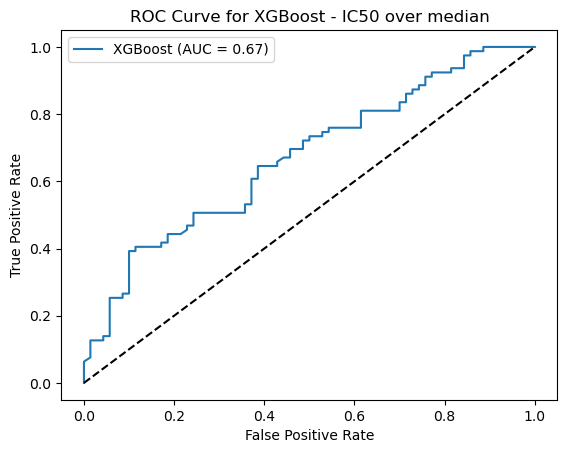

In [50]:
fpr, tpr, _ = roc_curve(y_test_ic50, y_proba_rf)
plt.figure()
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {final_metrics_rf["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for XGBoost - IC50 over median')
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix: Random Forest - IC50 over median')

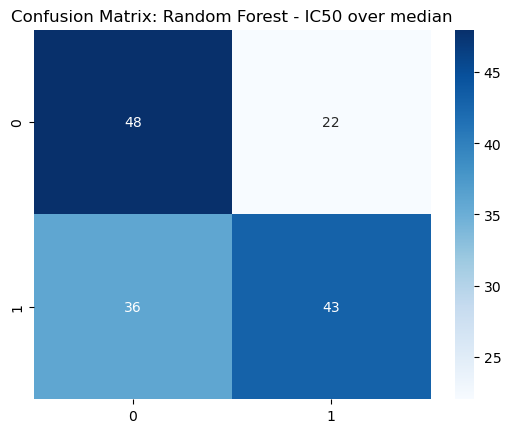

In [51]:
cm = confusion_matrix(y_test_ic50, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: Random Forest - IC50 over median')

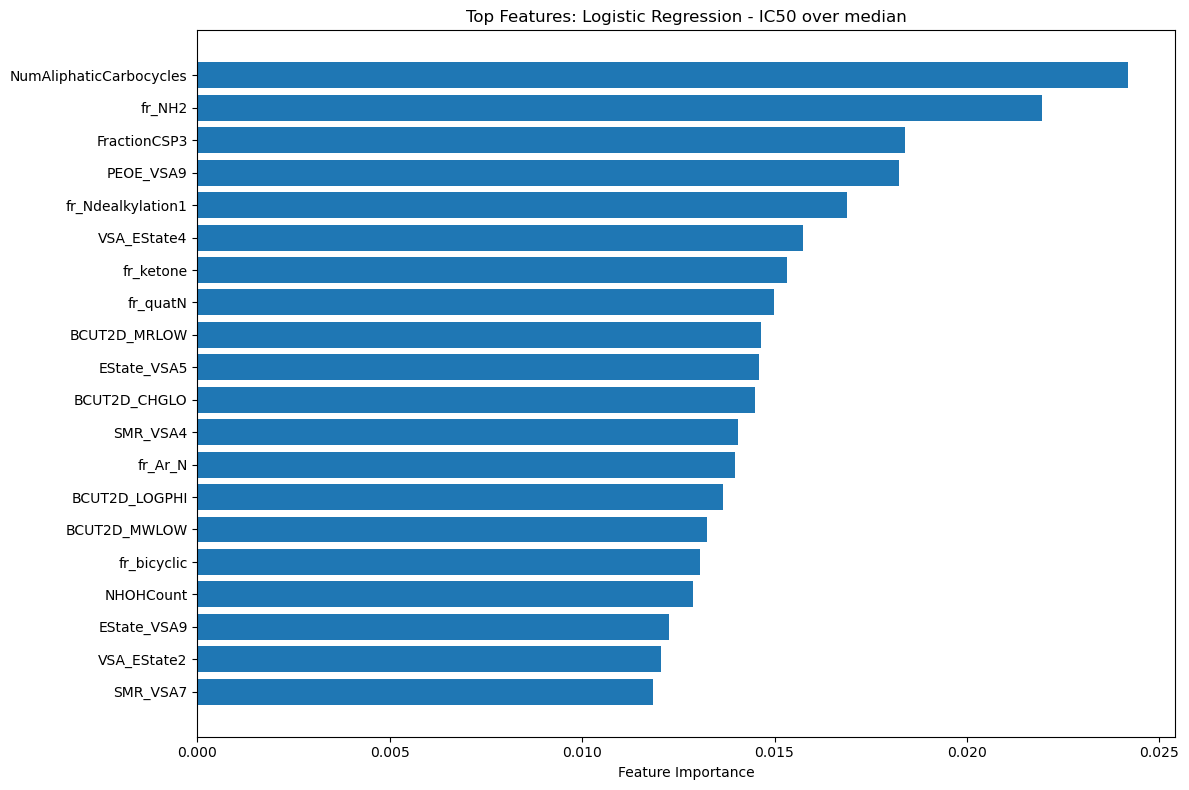

In [52]:
if hasattr(best_xgb_model, 'feature_importances_'):
    importances = best_xgb_model.feature_importances_
    sorted_idx = importances.argsort()[::-1]
    top_features = min(20, X.shape[1])
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), X.columns[sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title(f'Top Features: Logistic Regression - IC50 over median')
    plt.tight_layout()

## Сравнение моделей

In [53]:
metrics_comparisson = {
    "LR": final_metrics_lr,
    "RF": final_metrics_rf,
    "XGB": final_metrics_xgb,
}

df_metrics = pd.DataFrame(metrics_comparisson)

In [54]:
df_metrics

,LR,RF,XGB
roc_auc,0.643852,0.669711,0.652080
f1,0.583333,0.575342,0.597222
precision,0.646154,0.626866,0.661538
recall,0.531646,0.531646,0.544304
accuracy,0.597315,0.583893,0.610738


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Th

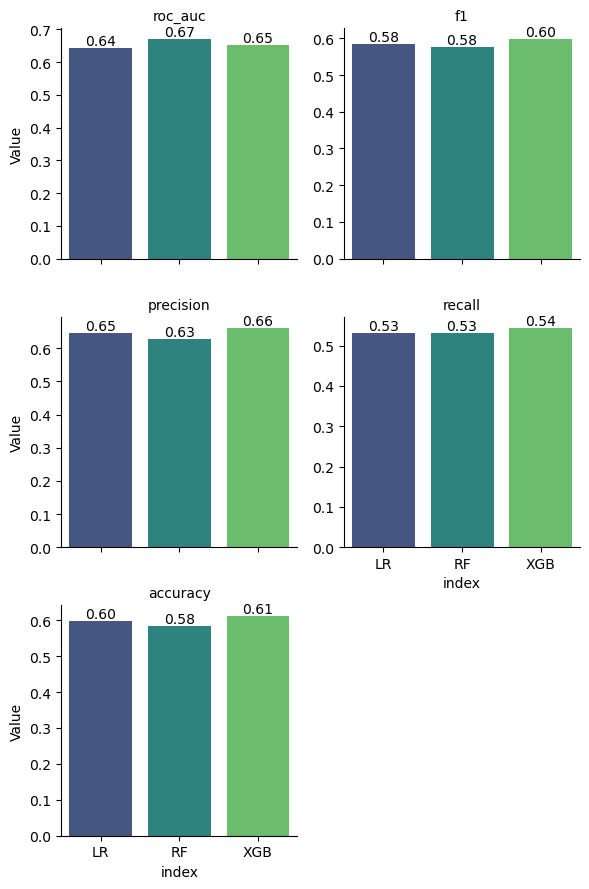

In [55]:
plot_data = df_metrics.T.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')

palette = sns.color_palette("viridis", n_colors=len(plot_data['index'].unique()))

g = sns.FacetGrid(plot_data, col="Metric", col_wrap=2, sharey=False)
g.map_dataframe(sns.barplot, x="index", y="Value", palette=palette, ci=None)
g.set_titles("{col_name}")

for ax in g.axes:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

g.tight_layout()
plt.show()

Как видно, модель XGB в совокупности даёт лучшие результаты